In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Set path to folder with 28 CSV files
data_folder = '7thheaven'  # <<< CHANGE THIS
all_files = [os.path.join(data_folder, f) for f in os.listdir(data_folder) if f.endswith('.csv')]

# Combine all station CSVs into a single DataFrame
df_list = []
for file in all_files:
    df = pd.read_csv(file)
    df_list.append(df)

full_df = pd.concat(df_list, ignore_index=True)

# Pivot to get one row per DOY with all stations as columns
pivoted = full_df.pivot_table(index='DOY', columns='STATION', values='PRECIPITATION')

# Get station metadata (assumed constant per station)
station_meta = full_df.drop_duplicates(subset='STATION')[['STATION', 'ELEVATION', 'LATITUDE', 'LONGITUDE']].set_index('STATION')

# ----------- Choose Target Station ------------
target_station = 'TEZPUR'  # <<< CHANGE THIS (e.g., 'Station28')
stations = pivoted.columns.tolist()
stations.remove(target_station)

# Build features: rainfall + elevation
X_rain = pivoted[stations]
elev_array = np.array([station_meta.loc[st, 'ELEVATION'] for st in stations])[np.newaxis, :]
X_elev = np.repeat(elev_array, len(X_rain), axis=0)
X = np.concatenate([X_rain.values, X_elev], axis=1)

# Labels
y = pivoted[target_station].values

# Drop rows with NaNs
valid_rows = ~np.isnan(X).any(axis=1) & ~np.isnan(y)
X = X[valid_rows]
y = y[valid_rows]

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MSE: 0.7455908787542811
R² Score: 0.9887491515083754


In [2]:
print("Available stations:")
print(pivoted.columns.tolist())

print("Your target station:", target_station)


Available stations:
['BALIPARA', 'BESSERIA', 'BIHAGURI', 'BOGIBIL', 'CHARIA BIL', 'CHARIDUAR', 'DEKARGAON', 'DHEKIAJULI', 'GAMANI BANGAON', 'GHAGRA GAON', 'HUGRAJULI', 'JAMUGURIHAT', 'KALIABHOMORA', 'KAMARCHUBURI', 'MAZGAON', 'MISSAMARI', 'MORISUTI', 'NADUAR', 'NAMERI NP', 'NIZ BIHAGURI GAON', 'ORANG NP', 'RANGAPARA', 'SALONIBARI', 'SIRAJULI', 'SITAL MARI', 'SOOTEA', 'TEZPUR', 'THELAMARA']
Your target station: TEZPUR


In [6]:
import pandas as pd
import numpy as np
import os
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Set path to folder with 28 CSV files
data_folder = '7thheaven'  # <<< CHANGE THIS
all_files = [os.path.join(data_folder, f) for f in os.listdir(data_folder) if f.endswith('.csv')]

# Combine all station CSVs into a single DataFrame
df_list = []
for file in all_files:
    df = pd.read_csv(file)
    df_list.append(df)

full_df = pd.concat(df_list, ignore_index=True)

# Pivot to get one row per DOY with all stations as columns
pivoted = full_df.pivot_table(index='DOY', columns='STATION', values='PRECIPITATION')

# Get station metadata (assumed constant per station)
station_meta = full_df.drop_duplicates(subset='STATION')[['STATION', 'ELEVATION', 'LATITUDE', 'LONGITUDE']].set_index('STATION')

# ----------- Choose Target Station ------------
target_station = 'CHARIA BIL'  # <<< CHANGE THIS (e.g., 'Station28')
stations = pivoted.columns.tolist()
stations.remove(target_station)

# Build features: rainfall + elevation
X_rain = pivoted[stations]
elev_array = np.array([station_meta.loc[st, 'ELEVATION'] for st in stations])[np.newaxis, :]
X_elev = np.repeat(elev_array, len(X_rain), axis=0)
X = np.concatenate([X_rain.values, X_elev], axis=1)

# Labels
y = pivoted[target_station].values

# Drop rows with NaNs
valid_rows = ~np.isnan(X).any(axis=1) & ~np.isnan(y)
X = X[valid_rows]
y = y[valid_rows]

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MSE: 0.7750319616153306
R² Score: 0.9898743118649795


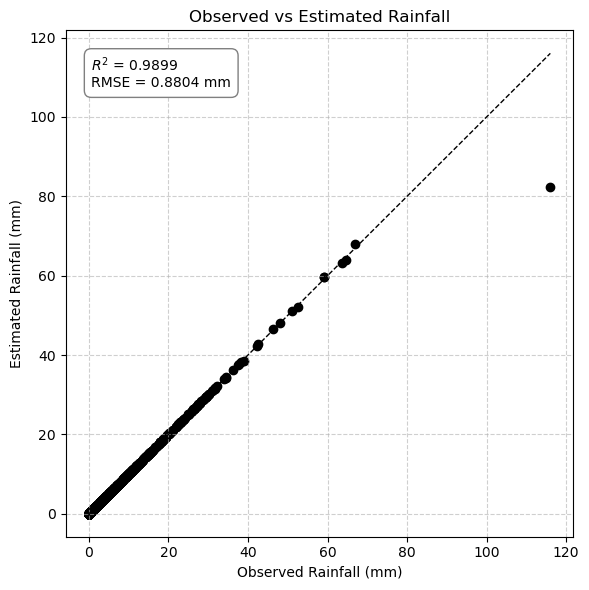

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

# Calculate metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Create scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='black')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=1)  # 1:1 line

# Labels
plt.xlabel("Observed Rainfall (mm)")
plt.ylabel("Estimated Rainfall (mm)")
plt.title("Observed vs Estimated Rainfall")

# Annotate R² and RMSEa
plt.text(
    0.05, 0.95,
    f"$R^2$ = {r2:.4f}\nRMSE = {rmse:.4f} mm",
    transform=plt.gca().transAxes,
    verticalalignment='top',
    bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5')
)

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [8]:
X_train.shape

(5844, 54)

In [9]:
X_test.shape

(1461, 54)

In [11]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# ---- Load & Prepare Data ----
data_folder = '7thheaven'  # <<< Change this to your path
all_files = [os.path.join(data_folder, f) for f in os.listdir(data_folder) if f.endswith('.csv')]

df_list = [pd.read_csv(file) for file in all_files]
full_df = pd.concat(df_list, ignore_index=True)

pivoted = full_df.pivot_table(index='DOY', columns='STATION', values='PRECIPITATION')
station_meta = full_df.drop_duplicates(subset='STATION')[['STATION', 'ELEVATION', 'LATITUDE', 'LONGITUDE']].set_index('STATION')

# Folder to save plots
os.makedirs("station_plots", exist_ok=True)

# ---- Model Training & Evaluation for Each Station ----
metrics = []

for target_station in pivoted.columns:
    stations = pivoted.columns.tolist()
    stations.remove(target_station)

    X_rain = pivoted[stations]
    elev_array = np.array([station_meta.loc[st, 'ELEVATION'] for st in stations])[np.newaxis, :]
    X_elev = np.repeat(elev_array, len(X_rain), axis=0)
    X = np.concatenate([X_rain.values, X_elev], axis=1)

    y = pivoted[target_station].values
    valid_rows = ~np.isnan(X).any(axis=1) & ~np.isnan(y)
    X = X[valid_rows]
    y = y[valid_rows]

    if len(y) < 10:  # Skip if too few valid data points
        continue

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
    model = RandomForestRegressor(n_estimators=2, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    metrics.append({'Station': target_station, 'R2': r2, 'RMSE': rmse})

    # ---- Plotting ----
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred, color='black', alpha=0.6)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=1)
    plt.xlabel("Observed Rainfall (mm)")
    plt.ylabel("Estimated Rainfall (mm)")
    plt.title(f"{target_station} - Observed vs Estimated")

    plt.text(
        0.05, 0.95,
        f"$R^2$ = {r2:.3f}\nRMSE = {rmse:.3f} mm",
        transform=plt.gca().transAxes,
        verticalalignment='top',
        bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5')
    )

    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.savefig(f"station_plots/{target_station.replace('/', '_')}_scatter.png")
    plt.close()

# ---- Save Metrics Table ----
metrics_df = pd.DataFrame(metrics)
metrics_df.to_csv("station_model_metrics.csv", index=False)


In [17]:
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    metrics.append({'Station': target_station, 'R2': r2, 'RMSE': rmse})

    # Save observed vs estimated data for Excel
    scatter_data = pd.DataFrame({
        'Observed': y_test,
        'Estimated': y_pred
    })
    scatter_data.to_csv(f"station_plots/{target_station.replace('/', '_')}_scatter_data.csv", index=False)

    # ---- Plotting ----
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred, color='black', alpha=0.6)
    ...
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=1)
    plt.xlabel("Observed Rainfall (mm)")
    plt.ylabel("Estimated Rainfall (mm)")
    plt.title(f"{target_station} - Observed vs Estimated")

    plt.text(
        0.05, 0.95,
        f"$R^2$ = {r2:.3f}\nRMSE = {rmse:.3f} mm",
        transform=plt.gca().transAxes,
        verticalalignment='top',
        bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5')
    )

    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.savefig(f"station_plots/{target_station.replace('/', '_')}_scatter.png")
    plt.close()

# ---- Save Metrics Table ----
metrics_df = pd.DataFrame(metrics)
metrics_df.to_csv("station_model_metrics.csv", index=False)


In [18]:
# ---- Model Training & Evaluation for Each Station ----
metrics = []

for target_station in pivoted.columns:
    stations = pivoted.columns.tolist()
    stations.remove(target_station)

    X_rain = pivoted[stations]
    elev_array = np.array([station_meta.loc[st, 'ELEVATION'] for st in stations])[np.newaxis, :]
    X_elev = np.repeat(elev_array, len(X_rain), axis=0)
    X = np.concatenate([X_rain.values, X_elev], axis=1)

    y = pivoted[target_station].values
    valid_rows = ~np.isnan(X).any(axis=1) & ~np.isnan(y)
    X = X[valid_rows]
    y = y[valid_rows]

    if len(y) < 10:
        print(f"Skipping {target_station} due to insufficient data: {len(y)} rows")
        continue

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
    model = RandomForestRegressor(n_estimators=2, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    metrics.append({'Station': target_station, 'R2': r2, 'RMSE': rmse})

    # ---- Save Observed vs Estimated CSV ----
    df_result = pd.DataFrame({
        'Observed': y_test,
        'Estimated': y_pred
    })
    csv_filename = f"station_plots/{target_station.replace('/', '_')}_scatter_data.csv"
    df_result.to_csv(csv_filename, index=False)
    print(f"Saved scatter data for {target_station} to {csv_filename}")

    # ---- Plotting ----
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred, color='black', alpha=0.6)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=1)
    plt.xlabel("Observed Rainfall (mm)")
    plt.ylabel("Estimated Rainfall (mm)")
    plt.title(f"{target_station} - Observed vs Estimated")

    plt.text(
        0.05, 0.95,
        f"$R^2$ = {r2:.3f}\nRMSE = {rmse:.3f} mm",
        transform=plt.gca().transAxes,
        verticalalignment='top',
        bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5')
    )

    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plot_filename = f"station_plots/{target_station.replace('/', '_')}_scatter.png"
    plt.savefig(plot_filename)
    plt.close()
    print(f"Saved plot for {target_station} to {plot_filename}")


Saved scatter data for BALIPARA to station_plots/BALIPARA_scatter_data.csv
Saved plot for BALIPARA to station_plots/BALIPARA_scatter.png
Saved scatter data for BESSERIA to station_plots/BESSERIA_scatter_data.csv
Saved plot for BESSERIA to station_plots/BESSERIA_scatter.png
Saved scatter data for BIHAGURI to station_plots/BIHAGURI_scatter_data.csv
Saved plot for BIHAGURI to station_plots/BIHAGURI_scatter.png
Saved scatter data for BOGIBIL to station_plots/BOGIBIL_scatter_data.csv
Saved plot for BOGIBIL to station_plots/BOGIBIL_scatter.png
Saved scatter data for CHARIA BIL to station_plots/CHARIA BIL_scatter_data.csv
Saved plot for CHARIA BIL to station_plots/CHARIA BIL_scatter.png
Saved scatter data for CHARIDUAR to station_plots/CHARIDUAR_scatter_data.csv
Saved plot for CHARIDUAR to station_plots/CHARIDUAR_scatter.png
Saved scatter data for DEKARGAON to station_plots/DEKARGAON_scatter_data.csv
Saved plot for DEKARGAON to station_plots/DEKARGAON_scatter.png
Saved scatter data for DHEKIA